In [1]:
import json
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter,ScalarFormatter
import datetime as datetime
import numpy as np

In [2]:
#read json
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
customer_tenure=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
d = datetime.datetime.now() 
customer_tenure['today']=d.strftime('%Y-%m-%d')

In [10]:
customer_tenure['became_member_on'] = pd.to_datetime(customer_tenure['became_member_on'], format='%Y%m%d')

In [11]:
customer_tenure['customer_tenure_in_days'] = (pd.to_datetime(customer_tenure.today) - pd.to_datetime(customer_tenure.became_member_on)).dt.days

In [12]:
customer_tenure['customer_tenure_in_years']=customer_tenure['customer_tenure_in_days']/365

In [13]:
customer_tenure['year'] = customer_tenure.became_member_on.dt.year

In [14]:
cum_line_graph=customer_tenure.groupby('year')['person'].nunique().cumsum().reset_index()
cum_line_graph.columns=['Year','Cum_Sum_of_Users']

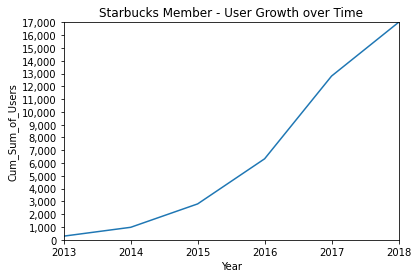

In [15]:
#Slide 5 - User Growth
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
sns.lineplot(ax = ax, data = cum_line_graph, x = 'Year', y = 'Cum_Sum_of_Users')
ax.set_xlim([2013, 2018])
ax.set_ylim(bottom=0, top=17000)
plt.yticks(np.arange(0, 17001, step=1000))
plt.title('Starbucks Member - User Growth over Time')
plt.show()

In [16]:
cum_dol_line_graph=customer_tenure.groupby(['year'])['amount'].sum().cumsum().reset_index()
cum_dol_line_graph.columns=['Member Signup Year','Cum_Sum_of_Transactions']
cum_dol_line_graph

,Member Signup Year,Cum_Sum_of_Transactions
0,2013,23630.30
1,2014,79376.62
2,2015,331139.70
3,2016,862998.66
4,2017,1537276.44
5,2018,1775451.97


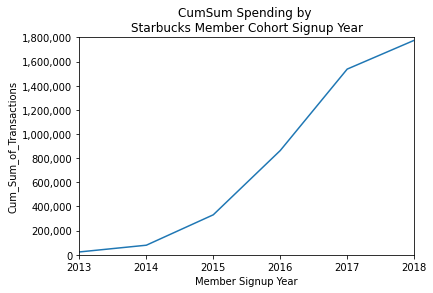

In [17]:
#Slide 6 - Cumsum spending by Starbucks Member Cohort Signup Year using Line Graph 
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
sns.lineplot(ax = ax, data = cum_dol_line_graph, x = 'Member Signup Year', 
             y = 'Cum_Sum_of_Transactions')
ax.set_xlim([2013, 2018])
ax.set_ylim([0,1800000])
plt.yticks(np.arange(0, 1800001, step=200000))
plt.title('CumSum Spending by \nStarbucks Member Cohort Signup Year')
plt.show()

In [18]:
cohort=customer_tenure.groupby(['year'])['amount'].sum().reset_index()
cohort.columns=['Member Signup Year','Total Spending (in dollars)']
cohort

,Member Signup Year,Total Spending (in dollars)
0,2013,23630.30
1,2014,55746.32
2,2015,251763.08
3,2016,531858.96
4,2017,674277.78
5,2018,238175.53


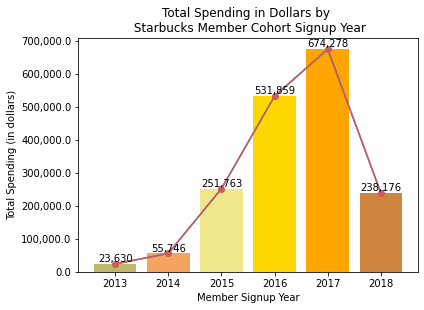

In [19]:
#Slide 6 - Total spending by Starbucks Member Cohort Signup Year - Bar Graph (Not CumSum)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
sns.lineplot(ax = ax, data = cohort, x = 'Member Signup Year', y = 'Total Spending (in dollars)')
plt.bar(cohort['Member Signup Year'], cohort['Total Spending (in dollars)'],
       color=['darkkhaki','sandybrown','khaki','gold','orange','peru'])

#https://stackoverflow.com/questions/70235487/matplotlib-adding-value-labels-to-bar-graph
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}')
plt.tight_layout()
plt.plot(cohort['Member Signup Year'], cohort['Total Spending (in dollars)'], '-o', color='indianred')
plt.title('Total Spending in Dollars by \n Starbucks Member Cohort Signup Year')
plt.show()